<div style="padding: 20px 0; text-align: center; font-weight: bold; font-size: 170%; background-color: #1d4055; color: #ffffff;"> 1.06. Διαδραστικότητα (Εργαστήριο - Λύσεις)</div>

# Slider

## Μελέτη εξίσωσης ευθείας

Δημιουργήστε ένα διαδραστικό παράδειγμα το οποίο μελετά την συνάρτηση $f(x)=ax+b$. Ο χρήστης θα μπορεί με αντίστοιχα sliders να επηρεάσει τις τιμές των a και b. Οι τιμές τους θα μπορούν να είναι στο διάστημα $[-5,5]$ και θα σχεδιάζεται αντίστοιχη γραφική παράσταση. Εκτός από την ίδια την συνάρτηση στην παράσταση θα φαίνεται και τα σημεία τομής της με τους άξονες.

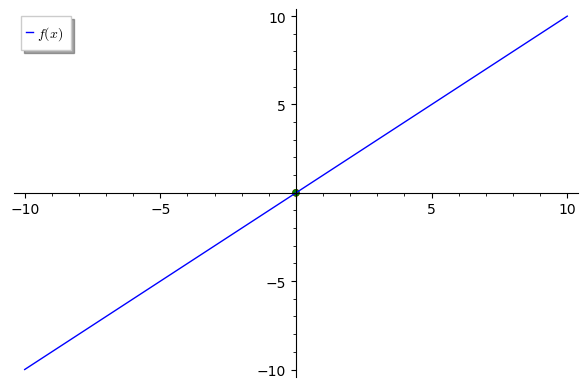

In [1]:
f(x, a, b) = a*x + b
@interact
def poly1st(a = slider(-5, 5, 0.1, default=1),
            b = slider(-5, 5, 0.1, default=0)
):
    g = Graphics()
    g += plot(f(x, a, b), (x, -10, 10), \
        color='blue', legend_label=r"$f(x)$")
    # Σημείο τομής με τον άξονα y
    yint = f(0, a, b)
    g += point((0, yint), color='red', size=30)
    # Σημείο τομής με τον άξονα x
    if a != 0:
        xint = -b / a
        g += point((xint, 0), color='green', size=30)
    show(g)

## Πολυώνυμο δευτέρου βαθμού

Για το πολυώνυμο δευτέρου βαθμού, $f(x)=ax^2+bx+c$ δημιουργήστε `interact` με τρία `slider`, ένα για κάθε συντελεστή. Εφόσον οι τιμές των a, b και c μεταβάλλονται μπορούμε να προσθέσουμε και σημεία ενδιαφέροντος, την κορυφή και τις ρίζες τα οποία και αυτά μεταβάλλονται ανάλογα. Θα πρέπει εκτός από τις περιπτώσεις για την Διακρίνουσα να λάβετε υπόψη και την περίπτωση που η παράμετρος a είναι μηδενική.

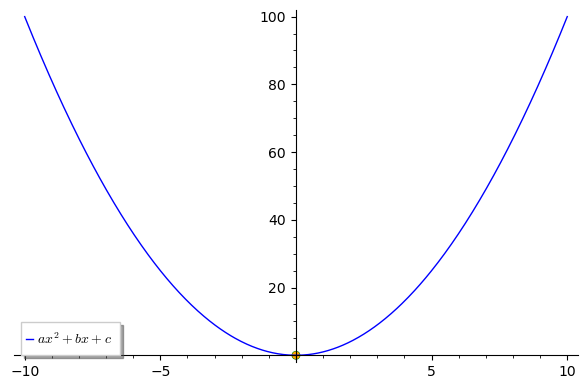

In [2]:
f(x, a, b, c) = a*x^2 + b*x + c
@interact
def poly2nd(a = slider(-5, 5, 0.1, default=1),
           b = slider(-5, 5, 0.1, default=0),
           c = slider(-10, 10, 0.1, default=0)
):
    g = plot(f(x, a, b, c), (x, -10, 10), \
          color='blue', legend_label='$'+latex(f(x))+'$')
    if a != 0:
        xv = -b/(2*a)
        yv = f(xv, a, b, c)
        g += point((xv, yv), color='green', size=40)
        # Ρίζες
        Δ = b^2 - 4*a*c
        if Δ > 0 and a != 0:
            x1 = (-b - sqrt(Δ))/(2*a)
            x2 = (-b + sqrt(Δ))/(2*a)
            g += point((x1, 0), color='orange', size=30)
            g += point((x2, 0), color='orange', size=30)
        elif Δ == 0:
            x0 = (-b)/(2*a)
            g += point((x0, 0), color='orange', size=30)
    elif a == 0 and b != 0:
        x0 = -c/b
        g += point((x0,0), color='orange', size=30)
    show(g)

## Εκθετική συνάρτηση και αντίστροφη

Δημιουργήσετε ένα διαδραστικό πρόγραμμα να μελετά τη συνάρτηση $f(x) = a^x$ όπου $a$ θετικός αριθμός. Ο χρήστης θα μπορεί να επιλέγει την τιμή της σταθεράς $a$ μέσω ενός `slider` στο διάστημα $[0.5, 2]$.

Στο ίδιο γράφημα να εμφανίζονται:

- η γραφική παράσταση της συνάρτησης $f(x)=a^x$,

- η αντίστροφη συνάρτηση $f^{-1}(x)=\log_a(x)$,

- και η ευθεία συμμετρίας $y=x$.

Για την εκθετική συνάρτηση $f(x)=a^x$:

- Αν $a>1$, η συνάρτηση είναι **γνησίως αύξουσα**.

- Αν $0<a<1$, η συνάρτηση είναι **γνησίως φθίνουσα**.

- Αν $a=1$, τότε $f(x)=1^x=1$, δηλαδή μια **σταθερή συνάρτηση**.

Κατά την εκτέλεση του κώδικα, το SageMath εκφράζει τη δύναμη $a^x$ ως: $a^x = e^{x \ln(a)}$ και όταν $a=1$, επειδή $\ln(1)=0$, ενδέχεται να προκύψει διαίρεση με το μηδέν.  Για τον λόγο αυτό για την περίπτωση $a=1$ θα πρέπει να γίνει ξεχωριστός χειρισμός με εντολή `if`.

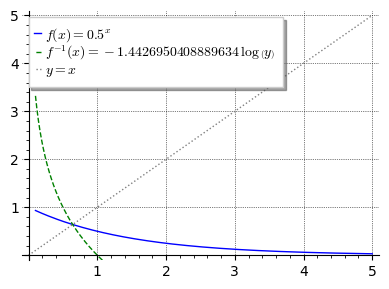

In [3]:
var('y')
f(x, a) = a ^ x
# solve: μορφή [x == log(y)/log(a)]
f_inv(x, a) = solve(a^x == y, x)[0].rhs()
@interact
def exp_inverse_plot(
    a = slider(0.5, 2, 0.1, default=0.5, label='Σταθερά a')
):
    a = round(a, 2)
    g = Graphics()
    # Ειδική περίπτωση: f(x) = 1
    if a == 1:
        g += plot(1, (x, 0.1, 5), color='orange',
                legend_label="$f(x)=1$")
    else:
        g += plot(f(x, a), (x, 0.1, 5), color='blue',
                  legend_label=f"$f(x)={latex(a)}^x$")
        g += plot(f_inv(x,a), (x, 0.1, 5), color='green',
                  linestyle='--', 
                  legend_label='$f^{-1}(x)='+latex(f_inv(x,a))+'$')
        g += plot(x, (x, 0, 5), color='gray', linestyle=':', 
                  legend_label="$y=x$")
    show(g, figsize=(4,3), gridlines=True, ymin=0, ymax=5)

# range_slider

## Εξερεύνηση γραφήματος με "zoom"

Θεωρούμε τη συνάρτηση:$f(x) = x \sin\!\left(\frac{1}{x}\right), \quad x \ne 0,$ και $f(0) = 0$. Κατασκευάστε διαδραστική εφαρμογή με δύο `range_slider`, η οποία θα επιτρέπει στον χρήστη να επιλέγει το ορατό διάστημα των αξόνων $x$ και $y$, ώστε να μπορεί να πραγματοποιεί **«ζουμ»** και να παρατηρεί πώς συμπεριφέρεται η συνάρτηση κοντά στο μηδέν ή σε άλλα σημεία. Επιτρέψτε τα διαστήματα να είναι ανάμεσα στα όρια $[-2,2]$.

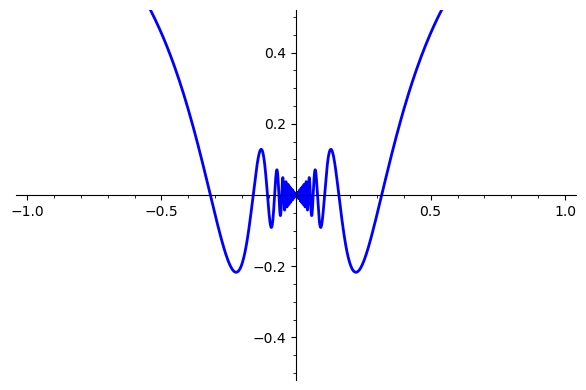

In [4]:
@interact
def zoom_plot(
    x_interval = range_slider(-2, 2, 0.1,
                default=(-1, 1),\
                label='Διάστημα x'),
    y_interval = range_slider(-1, 1, 0.1, 
                default=(-0.5, 0.5),\
                label='Διάστημα y')
):
    g = Graphics()
    x1, x2 = x_interval
    y1, y2 = y_interval
    f(x) = piecewise([
        [(x != 0), x*sin(1/x)],
        [(x == 0), 0]
    ])
    show(plot(x*sin(1/x), (x, x1, x2), 
              ymin=y1, ymax=y2,thickness=2))

# Selector

## Αντίστροφες συναρτήσεις

Δίνονται οι συναρτήσεις:

- $f_1(x) = 2x + 1$

- $f_2(x) = e^x$

- $f_3(x) = \ln(x+2)$.


Να κατασκευαστεί διαδραστική εφαρμογή που να επιτρέπει:

1. Την επιλογή μίας από τις παραπάνω συναρτήσεις με `selector`.

2. Τη σχεδίαση της κύριας συνάρτησης $f(x)$ για το διάστημα $[0, 2]$.

3. Τη σχεδίαση της αντίστροφης συνάρτησης $f^{-1}(x)$ υπολογισμένης με `solve(f(x)=y, x)`.

4. Την προσθήκη της γραμμής $y=x$ για οπτική αναφορά.

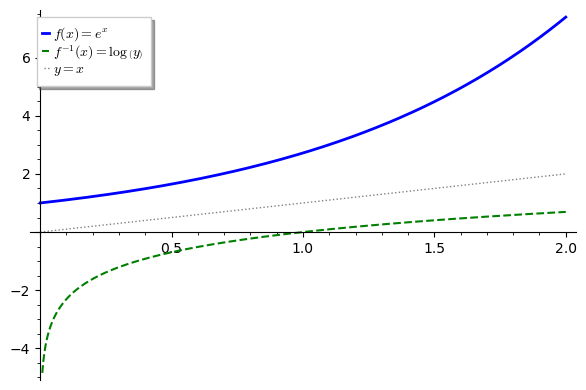

In [5]:
var('y')
@interact
def inverse_plot(
    func_choice = selector(['2x + 1', 'e^x', 'ln(x+2)'],
        default='e^x', label='Επιλογή συνάρτησης')
):
    g = Graphics()
    domain = (0,2)
    if func_choice == '2x + 1':
        f(x) = 2*x + 1
    elif func_choice == 'e^x':
        f(x) = e^x
    elif func_choice == 'ln(x+2)':
        f(x) = ln(x+2)
    g += plot(f, (x, domain[0], domain[1]), color='blue', \
            thickness=2, legend_label='$f(x)='+latex(f(x))+'$')
    # Υπολογισμός αντίστροφης με solve
    s = solve(f == y, x)
    inv_f = s[0].rhs()
    g += plot(inv_f, (y, domain[0], domain[1]), color='green', 
        linestyle='--', thickness=1.5, 
        legend_label='$f^{-1}(x)='+latex(inv_f)+'$')
    # Ευθεία y=x
    g += plot(x, (x, domain[0], domain[1]),
        color='grey', linestyle=':', thickness=1, legend_label='$y=x$')
    show(g, figsize=6)

# checkbox

## Πολυωνυμική συνάρτηση

Δίνεται η πολυωνυμική συνάρτηση $f(x) = x^3 - 3x$. Κατασκευάστε διαδραστική εφαρμογή που με αντίστοιχα checkboxs να επιλέγεται αν θα εμφανίζονται:

1. Η **καμπύλη** $f(x)$.

2. Τα σημεία κορυφής της συνάρτησης.

3. Οι ρίζες της συνάρτησης.

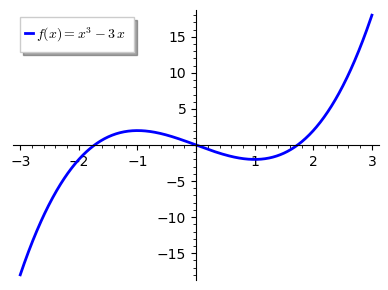

In [6]:
f(x) = x^3 - 3*x
@interact
def poly_plot(show_curve=checkbox(True, label="Καμπύλη"),
              show_extrema=checkbox(False, label="Κορυφές"),
              show_roots=checkbox(False, label="Ρίζες")
):
    g = Graphics()
    # Καμπύλη
    if show_curve:
        g += plot(f, (x, -3, 3), color='blue', thickness=2, 
                legend_label='$f(x)='+latex(f(x))+'$')
    # Κορυφές
    if show_extrema:
        critical_points = solve(diff(f,x)==0, x)
        pts = [(c.rhs(), f(c.rhs())) for c in critical_points]
        g += point(pts, size=40, color='red', legend_label='Κορυφές')
    
    # Ρίζες
    if show_roots:
        roots = solve(f==0, x)
        pts_roots = [(r.rhs(), 0) for r in roots]
        g += point(pts_roots, size=40, color='green', legend_label='Ρίζες')
    
    show(g, figsize=(4,3))

# input_box

## Έλεγχος πρώτου αριθμού και παραγοντοποίηση

Να κατασκευαστεί διαδραστική εφαρμογή που:

1. Ζητά από τον χρήστη να εισάγει έναν φυσικό αριθμό $p$ μέσω `input_box`. Θα πρέπει να γίνεται έλεγχος ότι ο ακέραιος αριθμός, τύπου δηλαδή `Integer`, είναι μεγαλύτερος του 0.

2. Ελέγχει αν ο αριθμός είναι πρώτος και εμφανίζει σχετικό μήνυμα.

3. Αν δεν είναι πρώτος, εμφανίζει την παραγοντοποίησή του.

Σημείωση: Αν ένας αριθμός είναι πρώτος ή όχι δίνεται από την μέθοδο `is_prime()` των `Integer` του SageMath. Η παραγοντοποίηση γίνεται μέσω της μεθόδου `factor()`.

In [7]:
@interact
def check_number(p = input_box(1, 
        label="Εισάγετε έναν φυσικό αριθμό", type=Integer)):
    if p < 1:
        print("Παρακαλώ εισάγετε έναν φυσικό αριθμό (n ≥ 1).")
        return
    if p.is_prime():
        print(p,'πρώτος αριθμός.')
    else:
        print(p,'σύνθετος αριθμός.') 
        print('Παραγοντοποίηση:', p.factor())

1 σύνθετος αριθμός.
Παραγοντοποίηση: 1


# Συνδυασμός widgets

##  Εφαπτομένη συνάρτησης

Θεωρούμε συνάρτηση $f(x)=x^3 - 3x + 1$.  
Θέλουμε να κατασκευάσουμε διαδραστική εφαρμογή στο SageMath που να επιτρέπει στον χρήστη:

1. να επιλέγει το σημείο $x_0$ στο οποίο θα σχεδιάζεται η εφαπτομένη της συνάρτησης $f(x)$,

2. να καθορίζει με έναν range slider το διάστημα $[x_1, x_2]$ στο οποίο θα προβάλλεται η εφαπτομένη,

3. να εμφανίζεται στο ίδιο γράφημα:
   - η καμπύλη $y = f(x)$ στο διάστημα $[-2, 2]$,

   - η εφαπτομένη στο σημείο $x_0$,

   - και το σημείο επαφής $(x_0, f(x_0))$.

Η εφαπτομένη δίνεται από τη εξίσωση: $y = f'(x_0)\,(x - x_0) + f(x_0)$ όπου $f'(x_0)$ η παράγωγος της $f(x)$ στο σημείο $x_0$.

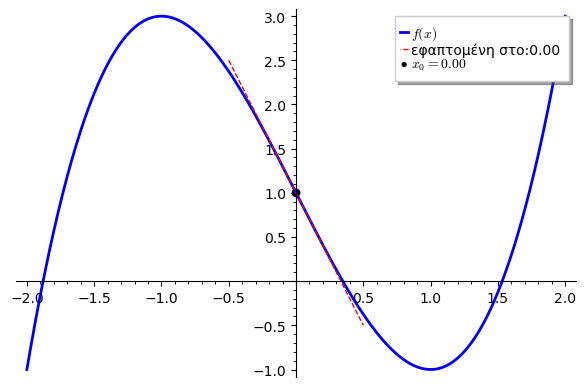

In [8]:
var('x')
f(x) = x^3-3*x+1
@interact
def tangent_plot(x0 = slider(-2, 2, 0.1, default=0, 
            label='Σημείο εφαπτομένης x₀'),
        interval = range_slider(-2, 2, 0.1, 
            default=(-0.5, 0.5), label='Πεδίο προβολής')):
    g = Graphics()
    # Εξίσωση εφαπτομένης: y = f'(x₀)*(x - x₀) + f(x₀)
    x1, x2 = interval
    x0_fmt = f"{x0:.2f}"
    y0 = f(x0)
    slope = diff(f, x)(x0)
    tangent(x) = slope * (x - x0) + y0
    g += plot(f, (x, -2, 2), color='blue', 
        thickness=2, legend_label='$f(x)$')
    g += plot(tangent, (x, x1, x2), color='red', 
        linestyle='--', legend_label='εφαπτομένη στο:'+str(x0_fmt))
    g += point((x0, y0), size=40, color='black', 
        legend_label=f'$x_0={x0:.2f}$')
    show(g)

## Στατιστική

Να δημιουργηθεί ένα διαδραστικό πρόγραμμα στο SageMath που να υπολογίζει βασικά στατιστικά μέτρα:

- μέση τιμή (`mean`)

- διάμεσο (`median`)

- επικρατούσα τιμή (`mode`)

μιας λίστας δεδομένων. Στην παρένθεση δίνεται η αντίστοιχη συνάρτηση SageMath,

1. Τα δεδομένα θα πρέπει να δίνονται μέσω ενός `input_box` και λίστας. Μπορείτε να θέσετε εξορισμού τιμές:
```
default = [1, 2, 3, 3, 4, 5, 6, 6, 6, 7]
```

Στο πεδίο, μπορεί να γίνει χρήση και της τεχνικής comprehension για περισσότερο αυτοματοποιημένο τρόπο εισαγωγής δεδομένων. Εναλλακτικά, μπορείτε να χρησιμοποιήσετε list comprehension ή/και random για αυτόματη δημιουργία λίστας:
```
[ZZ.random_element(1, 11) for i in range(20)]
```
3. Το προς υπολογισμό στατιστικό μέγεθος θα πρέπει να επιλέγεται μέσω ενός `selector`.

4. Μέσω της συνάρτησης `histogram` του SageMath εμφανίστε ιστόγραμμα με τις τιμές. Το επιλεγμένο στατιστικό μέγεθος θα φαίνεται στο ιστόγραμμα. Παράδειγμα δημιουργίας ιστογράμματος (και πρόσθεσής του στο γραφικό μας).
```
g +=histogram(data, bins=range(min(data), max(data)+2), 
    color='lightblue', edgecolor='black',
    title=label+":"+str(result))
```

/tmp/ipykernel_716047/3669789896.py:10: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://trac.sagemath.org/29662 for details.
  result = mean(data)


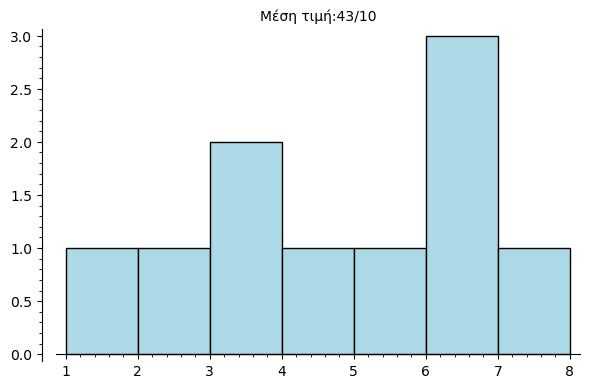

In [9]:
@interact
def StatsInteract(
    data = input_box(default = [1, 2, 3, 3, 4, 5, 6, 6, 6, 7], 
            label="Δεδομένα:"),
    statistic = selector(values = ["mean", "median", "mode"],
    label = "στατιστικό μέγεθος:",
    default = "mean")):
    g = Graphics()
    if (statistic == "mean"):
        result = mean(data)
        label = "Μέση τιμή"
    elif(statistic == "median"):
        result = median(data)
        label = "Διάμεσος"
    else:
        result = mode(data)
        label = "Επικρατούσα τιμή"
    g +=histogram(data, bins=range(min(data), max(data)+2), 
        color='lightblue', edgecolor='black', 
        title=label+":"+str(result))
    show(g)

# Δημοσίευση

## Οριζόντια βολή

![Μπάλα](football.png)
Θα πρέπει να δημιουργήσετε διαδραστική ιστοσελίδα η οποία θα περιλαμβάνει τουλάχιστον δύο διαδραστικά κελιά SageMath και θα μελετά την κίνηση ενός σώματος που εκτοξεύεται υπό γωνία, χωρίς αντίσταση αέρα.

Θεωρούμε ότι ένα σώμα εκτοξεύεται από σημείο ύψους $y_0$ με αρχική ταχύτητα $v_0$ και γωνία $\theta$ σε σχέση με τον ορίζοντα.

Η κίνηση του σώματος αναλύεται σε δύο ανεξάρτητες κινήσεις:

- **Οριζόντια**, με σταθερή ταχύτητα.

- **Κατακόρυφη**, με σταθερή επιτάχυνση $-g$ λόγω βαρύτητας.

Θα πρέπει να:

1. γραφούν οι παραμετρικές εξισώσεις της θέσης $x(t)$ και $y(t)$, καθώς και οι εξισώσεις των ταχυτήτων.

3. να υπολογιστούν:

    - Ο συνολικός χρόνος πτήσης $T$.

    - Το μέγιστο ύψος της τροχιάς $h_{\max}$.

    - Η οριζόντια εμβέλεια $R$.

4. να διερευνηθεί πώς επηρεάζεται η τροχιά όταν μεταβάλλονται η γωνία $\theta$ και η αρχική ταχύτητα $v_0$.  

Έστω:
- $v_0$: αρχική ταχύτητα.

- $\theta$: γωνία εκτόξευσης.

- $g = 9.81\,\mathrm{m/s^2}$: επιτάχυνση της βαρύτητας.

- $y_0$: αρχικό ύψος,

Δίνονται:

- Συνιστώσες αρχικής ταχύτητας:

    - $v_{0x} = v_0 \cos\theta$

    - $v_{0y} = v_0 \sin\theta$

- Παραμετρικές εξισώσεις θέσης:

    - $x(t) = v_0 \cos\theta \, t$

    - $y(t) = y_0 + v_0 \sin\theta \, t - \frac{1}{2} g t^2.$

- Ταχύτητες:

    - $v_x(t) = v_0 \cos\theta$
 
    - $v_y(t) = v_0 \sin\theta - g t$

- **Επιτάχυνση**: $\vec{a}(t) = (0,\,-g)$

- **Χρόνος πτήσης**: (για $y_0 = 0$) $T = \frac{2 v_0 \sin\theta}{g}$

- **Μέγιστο ύψος**: $h_{\max} = \frac{(v_0 \sin\theta)^2}{2g}$

- **Οριζόντια εμβέλεια**: $R = \frac{v_0^2 \sin(2\theta)}{g}$

Η μέγιστη εμβέλεια επιτυγχάνεται όταν $\theta = 45^\circ$.

```
<!DOCTYPE html>
<html lang="el">
<head>
  <meta charset="UTF-8">
  <title>Κίνηση Εκτοξευόμενου Σώματος — Σειρές Άσκηση</title>

  <!-- jQuery + SageCell (όπως στο παράδειγμά σου) -->
  <script src="https://sagecell.sagemath.org/static/jquery.min.js"></script>
  <script src="https://sagecell.sagemath.org/embedded_sagecell.js"></script>

  <script>
    $(function () {
      sagecell.makeSagecell({
        inputLocation: '.sage-interact',
        template: sagecell.templates.interact,
        evalButtonText: 'Εκτέλεση',
        autoeval: true,
        hide: ['editor', 'evalButton']
      });
    });
  </script>
</head>
<body>
  <h1>Κίνηση σώματος εκτοξευόμενου υπό γωνία (χωρίς αντίσταση αέρα)</h1>
  <img src='football.png'>
  <div class="section">
    <h2>Εκφώνηση</h2>
    <div class="formula">
      <p>Σκοπός του σεναρίου είναι η μελέτη της κίνησης ενός σώματος που εκτοξεύεται υπό γωνία, χωρίς αντίσταση αέρα.</p>
      <p>Θεωρούμε ότι το σώμα εκτοξεύεται από ύψος \(y_0\) με αρχική ταχύτητα \(v_0\) και γωνία \(\theta\) σε σχέση με τον ορίζοντα.</p>
      <p>Η κίνηση διαχωρίζεται σε οριζόντια (σταθερή ταχύτητα) και κατακόρυφη (επιτάχυνση \(-g\)).</p>
    </div>

    <p class="note"><strongΚαθήκοντα:</strong></p>
    <ol>
      <li>Να γραφούν οι παραμετρικές εξισώσεις της θέσης \(x(t),\,y(t)\) και οι εξισώσεις των ταχυτήτων \(v_x(t),\,v_y(t)\).</li>
      <li>Να υπολογιστούν:</li>
        <ul>
          <li>ο συνολικός χρόνος πτήσης \(T\),</li>
          <li>το μέγιστο ύψος \(h_{\max}\),</li>
          <li>η οριζόντια εμβέλεια \(R\).</li>
        </ul>
      <li>Να διερευνηθεί πώς μεταβάλλεται η τροχιά όταν αλλάζουμε τη γωνία \(\theta\) και την αρχική ταχύτητα \(v_0\).</li>
    </ol>

    <p class="small">
      Στα δεδομένα χρησιμοποιούμε: \(v_{0x}=v_0\cos\theta,\; v_{0y}=v_0\sin\theta\) και
      <br>
      \(x(t)=v_0\cos\theta\,t,\quad y(t)=y_0+v_0\sin\theta\,t-\tfrac{1}{2}g t^2\).
    </p>
  </div>

  <hr>

  <div class="section">
    <h2>Διαδραστικό: Σύνθεση μίας τροχιάς (υπολογισμοί & γράφημα)</h2>
    <p class="small">Εδώ μπορείτε να αλλάξετε τις παραμέτρους και να δείτε τις εξισώσεις, τα αριθμητικά αποτελέσματα και την γραφική παράσταση της τροχιάς.</p>

    <div class="sage-interact">
    <script type="text/x-sage">
@interact
def projectile_graph(
    v0 = slider(1, 100, 1, default=25, label="Αρχική ταχύτητα v₀ (m/s)"),
    theta_deg = slider(0, 90, 1, default=45, label="Γωνία θ (μοίρες)"),
    y0 = slider(0, 50, 1, default=0, label="Αρχικό ύψος y₀ (m)"),
    g = input_box(9.81, label="g (m/s²)"),
    show_vectors = checkbox(False, label="Εμφάνιση διανυσμάτων ταχύτητας")
):

    t = var('t')
    rad = pi * theta_deg / 180
    vx0, vy0 = v0*cos(rad), v0*sin(rad)
    # Παραμετρικές εξισώσεις
    x_t = vx0 * t
    y_t = y0 + vy0*t - (g/2)*t^2

    # Χρόνος πτήσης
    a, b, c = -g/2, vy0, y0
    delta = b**2 - 4*a*c
    if delta < 0:
        T = None
    else:
        r1 = (-b + sqrt(delta)) / (2*a)
        r2 = (-b - sqrt(delta)) / (2*a)
        roots = [r for r in [r1, r2] if r > 1e-8]
        T = max(roots) if roots else None

    # Μέγιστο ύψος
    t_h = vy0/g
    h_max = y0 + vy0*t_h - 0.5*g*t_h**2

    G = Graphics()

    if T:
        G += parametric_plot((x_t, y_t), (t, 0, T), thickness=3,
                             color='blue', legend_label="Τροχιά")

        G += point((0, y0), size=30, rgbcolor='green')

        G += point((vx0*T, 0), size=30, rgbcolor='black')

        # Μέγιστο ύψος
        G += point((vx0*t_h, h_max), size=30, rgbcolor='red')
        if show_vectors:
            for tt in [0, float(t_h), float(T*0.6), float(T*0.9)]:
                xval = float(vx0*tt)
                yval = float(y0 + vy0*tt - 0.5*g*tt**2)
                vxv = float(vx0)
                vyv = float(vy0 - g*tt)
                scale = max(1, v0/4)
                G += arrow((xval, yval), (xval+vxv/scale, yval+vyv/scale), thickness=2)
    else:
        G += text("Δεν υπάρχει τομή με y=0", (1,1), color='red')

    show(G, figsize=(8,4), gridlines=True, ymin=-1,
         ymax=max(1.2, h_max*1.2 if T else 2))

    </script>
    </div>
  </div>

  <hr>

  <div class="section">
    <h2>Διαδραστικό: Σύγκριση τροχιών — Επίδραση της γωνίας ή της ταχύτητας</h2>
    <p class="small">Εδώ μπορείτε να δημιουργήσετε πολλές τροχιές και να δείτε πώς αλλάζει το σχήμα όταν μεταβάλλετε τη γωνία ή την ταχύτητα.</p>

    <div class="sage-interact">
    <script type="text/x-sage">
@interact
def projectile_results(
    v0 = slider(1, 100, 1, default=25, label="Αρχική ταχύτητα v₀ (m/s)"),
    theta_deg = slider(0, 90, 1, default=45, label="Γωνία θ (μοίρες)"),
    y0 = slider(0, 50, 1, default=0, label="Αρχικό ύψος y₀ (m)"),
    g = input_box(9.81, label="g (m/s²)")
):

    rad = pi*theta_deg/180
    vx0, vy0 = v0*cos(rad), v0*sin(rad)

    # Χρόνος πτήσης
    a, b, c = -g/2, vy0, y0
    disc = b**2 - 4*a*c
    if disc < 0:
        T = None
    else:
        r1 = (-b + sqrt(disc)) / (2*a)
        r2 = (-b - sqrt(disc)) / (2*a)
        roots = [r for r in [r1,r2] if r > 1e-8]
        T = max(roots) if roots else None

    # Μέγιστο ύψος
    t_h = vy0/g
    h_max = y0 + vy0*t_h - 0.5*g*t_h^2

    # Εμβέλεια
    R = vx0 * T if T else None

    html_out = "<h3>Αποτελέσματα</h3>"
    html_out += "<p><b>vx₀ =</b> %.3f m/s, <b>vy₀ =</b> %.3f m/s</p>" % (vx0, vy0)

    if T:
        html_out += "<p><b>Χρόνος πτήσης:</b> %.4f s</p>" % float(T)
        html_out += "<p><b>Μέγιστο ύψος:</b> %.4f m</p>" % float(h_max)
        html_out += "<p><b>Οριζόντια εμβέλεια:</b> %.4f m</p>" % float(R)
    else:
        html_out += "<p style='color:red;'>Η τροχιά δεν τέμνει ποτέ το επίπεδο y=0.</p>"

    show(html(html_out))

    </script>
    </div>
  </div>

  <hr>

  <div class="section">
    <h2>Σημειώσεις / Επεξηγήσεις</h2>
    <ul>
      <li>Ο τύπος για <strong>χρόνο πτήσης</strong> (όταν y₀ = 0) είναι \(T = \dfrac{2 v_0 \sin\theta}{g}\).</li>
      <li>Το <strong>μέγιστο ύψος</strong> δίνεται από \(h_{\max} = \dfrac{(v_0\sin\theta)^2}{2g}\) (για y₀ = 0, αλλιώς προσθέτουμε y₀).</li>
      <li>Η <strong>οριζόντια εμβέλεια</strong> (για y₀ = 0) είναι \(R = \dfrac{v_0^2 \sin(2\theta)}{g}\) — μέγιστη όταν θ = 45°.</li>
      <li>Στα παραδείγματα τα g = 9.81 m/s², αλλά μπορείς να το αλλάξεις για προσομοιώσεις σε άλλους πλανήτες.</li>
    </ul>
  </div>

  <footer class="small">
    <p>Φτιαγμένο με SageMath / SageCell interact — προσαρμοσμένο από παράδειγμα για σειρές Fourier.</p>
  </footer>

</body>
</html>

```